## First, let's install and import the libraries.(The libraries are already installed on my end, but if they are not on yours, please install the missing libraries first.)

In [1]:
import numpy as np  # Linear algebra, for mathematical computations
import pandas as pd  # Data processing, for reading CSV files (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Visualization, for creating plots and graphs
import seaborn as sns  # Visualization, for creating heatmaps and advanced plots
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # Regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation, error metrics, and R-squared
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the train and test datasets
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Display the first few rows to understand the structure of the data
print(train.head())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [3]:
# Check for missing values in the train dataset
missing_values = train.isnull().sum()

# Display the columns with missing values
print(missing_values)


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


## Now that we know there are no missing values, we can proceed to the next steps.

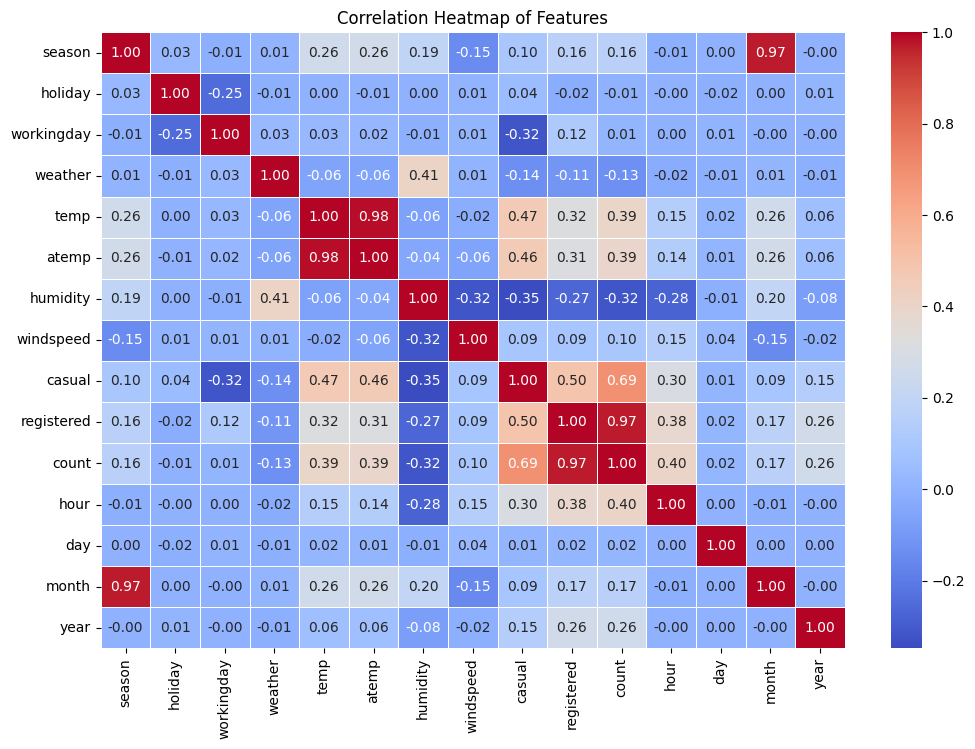

In [4]:
# Convert 'datetime' to datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

# Extract relevant features (hour, day, month, year)
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year

# Now, drop the original 'datetime' column and recalculate the correlation
train = train.drop(columns=['datetime'])

# Calculate the correlation matrix again
correlation_matrix = train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


## Now that we've seen the dependencies, we can move on to the training part.

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features and target
X = train.drop(columns=['count'])  # Features (everything except 'count')
y = train['count']  # Target variable (the 'count' column)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Print the evaluation results for traditional models
for name, metrics in results.items():
    print(f'{name} Mean Squared Error: {metrics["MSE"]}')
    print(f'{name} R-squared: {metrics["R2"]}')
    print('---')

# Prepare data for LSTM model
X_train_lstm = np.expand_dims(X_train, axis=2)
X_test_lstm = np.expand_dims(X_test, axis=2)

# Build and train the LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions with the LSTM model
y_lstm_pred = lstm_model.predict(X_test_lstm)

# Evaluate the LSTM model
lstm_mse = mean_squared_error(y_test, y_lstm_pred)
lstm_r2 = r2_score(y_test, y_lstm_pred)

# Print the evaluation results for the LSTM model
print(f'LSTM Mean Squared Error: {lstm_mse}')
print(f'LSTM R-squared: {lstm_r2}')


2025-03-17 17:11:49.480429: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742202709.493465    7859 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742202709.497772    7859 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742202709.507984    7859 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742202709.507996    7859 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742202709.507997    7859 computation_placer.cc:177] computation placer alr

Linear Regression Mean Squared Error: 1.3631570006345403e-25
Linear Regression R-squared: 1.0
---
Decision Tree Mean Squared Error: 36.22451790633609
Decision Tree R-squared: 0.9989025180024448
---
Random Forest Mean Squared Error: 9.695146097337009
Random Forest R-squared: 0.9997062694296441
---
Gradient Boosting Mean Squared Error: 25.03087398522908
Gradient Boosting R-squared: 0.9992416480558032
---
Epoch 1/10


W0000 00:00:1742202714.948486    7859 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/mo/Code/YouBikeLive/venv2/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11776.1689
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 117.8032
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 40.0847
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23.6018
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.4825
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15.7355
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.8677
Epoch 8/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.8685
Epoch 9/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.7744
Epoch 10/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.2982
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM Mean Squared Error: 8.325736045837402
LSTM R-squared: 0.9997477531433105


In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from time import time

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming 'train' is a DataFrame that contains your dataset
# Define the weather columns
weather_columns = ['weather', 'temp', 'atemp', 'humidity', 'windspeed']  # Adjust based on your dataset

# Split the dataset into features and target
X_with_weather = train.drop(columns=['count'])  # Features with weather data
X_without_weather = train.drop(columns=['count'] + weather_columns)  # Features without weather data
y = train['count']  # Target variable (the 'count' column)

# Split the data into training and testing sets (80% train, 20% test)
X_train_with_weather, X_test_with_weather, y_train, y_test = train_test_split(X_with_weather, y, test_size=0.2, random_state=42)
X_train_without_weather, X_test_without_weather, _, _ = train_test_split(X_without_weather, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Function to train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        start_time = time()
        model.fit(X_train, y_train)
        training_time = time() - start_time
        
        start_time = time()
        y_pred = model.predict(X_test)
        inference_time = time() - start_time
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        results[name] = {
            'MSE': mse,
            'R2': r2,
            'MAE': mae,
            'MAPE': mape,
            'Training Time': training_time,
            'Inference Time': inference_time
        }
    return results

# Evaluate models with weather data
results_with_weather = evaluate_models(X_train_with_weather, X_test_with_weather, y_train, y_test)

# Evaluate models without weather data
results_without_weather = evaluate_models(X_train_without_weather, X_test_without_weather, y_train, y_test)

# Print the evaluation results for models with weather data
print("Results with weather data:")
for name, metrics in results_with_weather.items():
    print(f'{name} Mean Squared Error: {metrics["MSE"]}')
    print(f'{name} R-squared: {metrics["R2"]}')
    print(f'{name} Mean Absolute Error: {metrics["MAE"]}')
    print(f'{name} Mean Absolute Percentage Error: {metrics["MAPE"]}')
    print(f'{name} Training Time: {metrics["Training Time"]} seconds')
    print(f'{name} Inference Time: {metrics["Inference Time"]} seconds')
    print('---')

# Print the evaluation results for models without weather data
print("Results without weather data:")
for name, metrics in results_without_weather.items():
    print(f'{name} Mean Squared Error: {metrics["MSE"]}')
    print(f'{name} R-squared: {metrics["R2"]}')
    print(f'{name} Mean Absolute Error: {metrics["MAE"]}')
    print(f'{name} Mean Absolute Percentage Error: {metrics["MAPE"]}')
    print(f'{name} Training Time: {metrics["Training Time"]} seconds')
    print(f'{name} Inference Time: {metrics["Inference Time"]} seconds')
    print('---')

# Prepare data for LSTM model
X_train_lstm_with_weather = np.expand_dims(X_train_with_weather, axis=2)
X_test_lstm_with_weather = np.expand_dims(X_test_with_weather, axis=2)
X_train_lstm_without_weather = np.expand_dims(X_train_without_weather, axis=2)
X_test_lstm_without_weather = np.expand_dims(X_test_without_weather, axis=2)

# Function to build and evaluate LSTM model
def evaluate_lstm(X_train_lstm, X_test_lstm, y_train, y_test):
    lstm_model = tf.keras.Sequential([
        tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
        tf.keras.layers.Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')

    # Train the LSTM model
    start_time = time()
    lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)
    training_time = time() - start_time

    # Make predictions with the LSTM model
    start_time = time()
    y_lstm_pred = lstm_model.predict(X_test_lstm)
    inference_time = time() - start_time

    # Reshape y_lstm_pred to be a 1D array
    y_lstm_pred = y_lstm_pred.flatten()

    # Evaluate the LSTM model
    lstm_mse = mean_squared_error(y_test, y_lstm_pred)
    lstm_r2 = r2_score(y_test, y_lstm_pred)
    lstm_mae = mean_absolute_error(y_test, y_lstm_pred)
    lstm_mape = mean_absolute_percentage_error(y_test, y_lstm_pred)

    return {
        'MSE': lstm_mse,
        'R2': lstm_r2,
        'MAE': lstm_mae,
        'MAPE': lstm_mape,
        'Training Time': training_time,
        'Inference Time': inference_time
    }

# Evaluate LSTM model with weather data
results_lstm_with_weather = evaluate_lstm(X_train_lstm_with_weather, X_test_lstm_with_weather, y_train, y_test)

# Evaluate LSTM model without weather data
results_lstm_without_weather = evaluate_lstm(X_train_lstm_without_weather, X_test_lstm_without_weather, y_train, y_test)

# Print the evaluation results for the LSTM model with weather data
print("LSTM Results with weather data:")
print(f'LSTM Mean Squared Error: {results_lstm_with_weather["MSE"]}')
print(f'LSTM R-squared: {results_lstm_with_weather["R2"]}')
print(f'LSTM Mean Absolute Error: {results_lstm_with_weather["MAE"]}')
print(f'LSTM Mean Absolute Percentage Error: {results_lstm_with_weather["MAPE"]}')
print(f'LSTM Training Time: {results_lstm_with_weather["Training Time"]} seconds')
print(f'LSTM Inference Time: {results_lstm_with_weather["Inference Time"]} seconds')
print('---')

# Print the evaluation results for the LSTM model without weather data
print("LSTM Results without weather data:")
print(f'LSTM Mean Squared Error: {results_lstm_without_weather["MSE"]}')
print(f'LSTM R-squared: {results_lstm_without_weather["R2"]}')
print(f'LSTM Mean Absolute Error: {results_lstm_without_weather["MAE"]}')
print(f'LSTM Mean Absolute Percentage Error: {results_lstm_without_weather["MAPE"]}')
print(f'LSTM Training Time: {results_lstm_without_weather["Training Time"]} seconds')
print(f'LSTM Inference Time: {results_lstm_without_weather["Inference Time"]} seconds')

Results with weather data:
Linear Regression Mean Squared Error: 1.3631570006345403e-25
Linear Regression R-squared: 1.0
Linear Regression Mean Absolute Error: 2.8604707624086483e-13
Linear Regression Mean Absolute Percentage Error: 1.5716483292727903e-12
Linear Regression Training Time: 0.003031015396118164 seconds
Linear Regression Inference Time: 0.0009090900421142578 seconds
---
Decision Tree Mean Squared Error: 36.22451790633609
Decision Tree R-squared: 0.9989025180024448
Decision Tree Mean Absolute Error: 2.9545454545454546
Decision Tree Mean Absolute Percentage Error: 1.3109958664465273
Decision Tree Training Time: 0.045152902603149414 seconds
Decision Tree Inference Time: 0.0013821125030517578 seconds
---
Random Forest Mean Squared Error: 9.695146097337009
Random Forest R-squared: 0.9997062694296441
Random Forest Mean Absolute Error: 1.2357116620752986
Random Forest Mean Absolute Percentage Error: 0.6127339701239758
Random Forest Training Time: 2.914919137954712 seconds
Random 

/home/mo/Code/YouBikeLive/venv2/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24372.2129
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 183.2039
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 147.7048
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 86.8264
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52.2741
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23.9507
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 75.2061
Epoch 8/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 48.4413
Epoch 9/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24.1896
Epoch 10/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.4622
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/10


/home/mo/Code/YouBikeLive/venv2/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15518.2500
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.8654
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1523
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1429
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6426
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3563
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6097
Epoch 8/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7782
Epoch 9/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6798
Epoch 10/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2630
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM Results with weather data:
LSTM Mean Squared Error: 11.68113899230957
LSTM R-squared: 0.9996461272239685
LSTM Mean Absolute Error: 2.2691218852996826
LSTM Mean Absolute Percentage Error: 7.499694118969775
LSTM Training Time: 8.063600778579712 seconds
LSTM Inference Time: 0.2857553958892822 